# github_readme_nlp

In [1]:
# Setup environment
import pandas as pd
from requests import get
from bs4 import BeautifulSoup
import os
import time
import pandas as pd
import numpy as np
import unicodedata
import re
import json
import os
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

## Acquire/Prepare

**Task** show steps to acquire and prepare

- original, cleaned, stem, lemmatize notes

In [2]:
df = prepare.get_prepped()

In [3]:
df.head()

,language,title,original,cleaned,stemmed,lemmatized
0,Python,GitHub - donnemartin/system-design-primer: Lea...,English ∙ 日本語 ∙ 简体中文 ∙ 繁體中文 | العَرَبِيَّة‎ ∙ ...,english portugues brasil deutsch italiano pols...,english portugu brasil deutsch italiano polski...,english portugues brasil deutsch italiano pols...
1,Python,GitHub - vinta/awesome-python: A curated list ...,Awesome Python \nA curated list of awesome Pyt...,awesome python curated list awesome python fra...,awesom python curat list awesom python framewo...,awesome python curated list awesome python fra...
2,Python,GitHub - public-apis/public-apis: A collective...,Public APIs \nA collective list of free APIs f...,public apis collective list free apis use soft...,public api collect list free api use softwar w...,public apis collective list free apis use soft...
3,Python,GitHub - TheAlgorithms/Python: All Algorithms ...,The Algorithms - Python\n \n \n \n \n \n \nAll...,algorithms python algorithms implemented pytho...,algorithm python algorithm implement python ed...,algorithm python algorithm implemented python ...
4,Python,GitHub - tensorflow/models: Models and example...,TensorFlow Models\nThis repository contains a ...,tensorflow models repository contains number d...,tensorflow model repositori contain number dif...,tensorflow model repository contains number di...


## Prep Summary

- Create data frame with cleaned data and language listed.

In [4]:
lemmas_df = df[['language', 'title', 'lemmatized']]

## Explore & Define Features

### Category Distribution

In [5]:
lemmas_df.dropna(inplace=True)

In [6]:
lemmas_df.shape

(79, 3)

In [7]:
lemmas_df.language.value_counts(normalize = True)

JavaScript    0.253165
Shell         0.253165
Python        0.253165
PHP           0.240506
Name: language, dtype: float64

,n,percent
PHP,20,0.25
JavaScript,20,0.25
Shell,20,0.25
Python,20,0.25


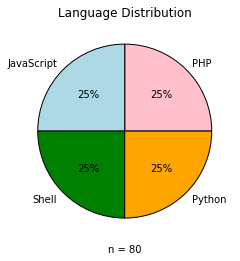

In [8]:
df.language.value_counts().plot.pie(
    colors = ['pink', 'lightblue', 'green', 'orange'], autopct = '%.0f%%')
plt.title("Language Distribution")
plt.ylabel("")
plt.xlabel('n = %d' % df.shape[0])

pd.concat(
    [df.language.value_counts(), df.language.value_counts(normalize = True)], axis = 1).set_axis(["n", "percent"], axis = 1, inplace = False)

**Note:** join all Readme and find high count of all words

In [9]:
pd.Series(" ".join(lemmas_df.lemmatized).split()).value_counts().head(10)

data        810
use         808
yes         693
file        650
python      583
unknown     566
library     508
using       498
aws         445
learning    445
dtype: int64

**Note:** words within each language

In [11]:
all_words = ' '.join(lemmas_df.lemmatized).split()

python_words = ' '.join(lemmas_df[lemmas_df.language == 'Python'].lemmatized).split()

javascript_words = ' '.join(lemmas_df[lemmas_df.language == 'JavaScript'].lemmatized).split()

php_words = ' '.join(lemmas_df[lemmas_df.language == 'PHP'].lemmatized).split()

shell_words = ' '.join(lemmas_df[lemmas_df.language == 'Shell'].lemmatized).split()

- Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how often each of the words occurs.

In [12]:
all_freq = pd.Series(all_words).value_counts()

python_words_freq = pd.Series(python_words).value_counts()

javascript_words_freq = pd.Series(javascript_words).value_counts()

php_words_freq = pd.Series(php_words).value_counts()

shell_words_freq = pd.Series(shell_words).value_counts()

### Term Frequency

Generally, when you hear 'Term Frequency', it is referring to the number of documents in which a word appears. When we move on to computing TF-IDF, this basic definition of Term Frequency applies.

However, term frequency can be calculated in a number of ways, all of which reflect how frequently a word appears in a document.

Raw Count: This is simply the count of the number of occurances of each word.
Frequency: The number of times each word appears divided by the total number of words.
Augmented Frequency: The frequency of each word divided by the maximum frequency. This can help prevent bias towards larger documents.

In [45]:
raw_count = (
    pd.concat([all_freq, python_words_freq, javascript_words_freq, php_words_freq, shell_words_freq], axis=1, sort=True)
    .rename(columns={0: "All", 1: "Python", 2: "JavaScript", 3: "PHP", 4: "Shell"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

In [46]:
raw_count.T

,&#9;,aaa,aaaffefadffffdebccbecffeeddffffdebffef,aac,aalaapfakeryoutube,aan,aanzeejavascript,ab,abacus,abbrev,...,zshthemerandom,zshthemerandomcandidates,zshthemerobbyrussell,zshyourpath,zulauf,zun,zxf,zynga,zyszys,zyszysgmailcom
All,32,1,1,3,1,1,1,6,2,2,...,1,1,1,1,1,1,1,2,1,1
Python,0,0,0,2,0,0,0,4,0,0,...,0,0,0,0,0,0,1,1,0,0
JavaScript,16,0,0,1,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,1,1
PHP,2,0,0,0,1,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
Shell,14,1,1,0,0,0,0,0,0,2,...,1,1,1,1,0,1,0,1,0,0


**Task** Find record that has &#9

In [47]:
raw_count.sort_values(by="All").tail(10)

,All,Python,JavaScript,PHP,Shell
aws,445,13,0,0,432
learning,445,400,9,3,33
using,498,150,87,48,213
library,508,438,32,26,12
unknown,566,565,0,0,1
python,583,494,2,3,84
file,650,231,82,59,278
yes,693,683,6,2,2
use,808,198,159,71,380
data,810,532,74,29,175


- Most common words overall?
- Most common Python, JavaScript, PHP, Shell words?
- Any words that uniquely Python, JavaScript, PHP, Shell words?

Text(0.5, 1.0, '10 most common words')

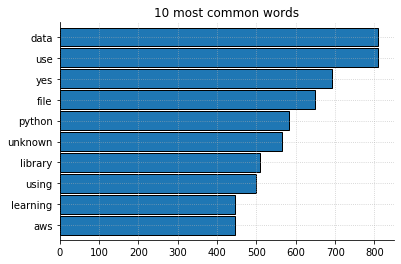

In [48]:
raw_count.sort_values(by='All')['All'].tail(10).plot.barh(width=.9)
plt.title('10 most common words')

Text(0.5, 1.0, '10 most common Python words')

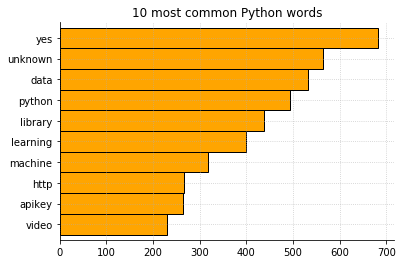

In [49]:
raw_count.sort_values(by='Python').Python.tail(10).plot.barh(width=1, color='Orange')
plt.title('10 most common Python words')

Text(0.5, 1.0, 'What are the most common JavaScript words')

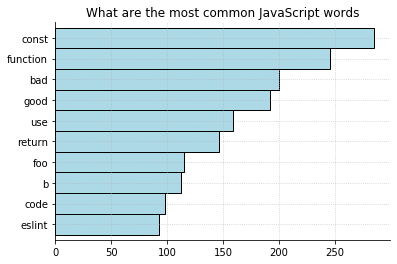

In [50]:
raw_count.sort_values(by='JavaScript').JavaScript.tail(10).plot.barh(width=1, color='lightblue')
plt.title('What are the most common JavaScript words')

Text(0.5, 1.0, 'What are the most common PHP words')

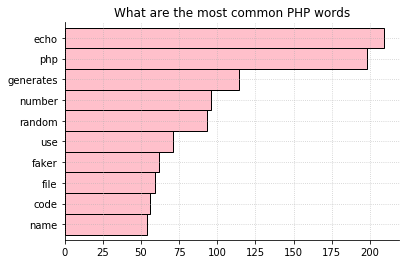

In [51]:
raw_count.sort_values(by='PHP').PHP.tail(10).plot.barh(width=1, color='pink')
plt.title('What are the most common PHP words')

Text(0.5, 1.0, 'What are the most common Shell words')

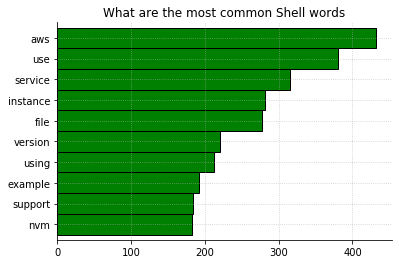

In [52]:
raw_count.sort_values(by='Shell').Shell.tail(10).plot.barh(width=1, color='green')
plt.title('What are the most common Shell words')

In [56]:
raw_count.head()

,All,Python,JavaScript,PHP,Shell
&#9;,32,0,16,2,14
aaa,1,0,0,0,1
aaaffefadffffdebccbecffeeddffffdebffef,1,0,0,0,1
aac,3,2,1,0,0
aalaapfakeryoutube,1,0,0,1,0


In [80]:
tf_df = raw_count[['All']];
tf_df = tf_df.rename(columns={'All': 'raw_count'})
tf_df = tf_df.assign(frequency = lambda lemmas_df: lemmas_df.raw_count / lemmas_df.raw_count.sum())
tf_df = tf_df.assign(augmented_frequency = lambda lemmas_df: lemmas_df.frequency / lemmas_df.frequency.max())
tf_df.frequency.max()

tf_df.head()


,raw_count,frequency,augmented_frequency
&#9;,32,0.000281,0.039506
aaa,1,0.000009,0.001235
aaaffefadffffdebccbecffeeddffffdebffef,1,0.000009,0.001235
aac,3,0.000026,0.003704
aalaapfakeryoutube,1,0.000009,0.001235


In [68]:
mask = lemmas_df.lemmatized.apply(lambda x: '&#9;' in x)

df.original[74]

'iTerm Color Schemes\n\nIntro\nInstallation Instructions\nContribute\nScreenshots\nCredits\nExtra\n\nX11 Installation\nKonsole color schemes\nTerminator color schemes\nMac OS Terminal color schemes\nPuTTY color schemes\nXfce Terminal color schemes\nFreeBSD vt(4) color schemes\nPreviewing color schemes\nMobaXterm color schemes\nLXTerminal color schemes\n\n\n\nIntro\nThis is a set of color schemes for iTerm (aka iTerm2). It also includes ports to Terminal, Konsole, PuTTY, Xresources, XRDB, Remmina, Termite, XFCE, Tilda, FreeBSD VT, Terminator, Kitty, MobaXterm, LXTerminal, Microsoft\'s Windows Terminal, Visual Studio\nScreenshots below and in the screenshots directory.\nInstallation Instructions\nThere are 2 ways to install an iTerm theme (both go to the same configuration location):\n\n\nDirect way via keyboard shortcut:\n\nLaunch iTerm 2. Get the latest version at iterm2.com\nType CMD+i (⌘+i)\nNavigate to Colors tab\nClick on Color Presets\nClick on Import\nClick on the schemes folder\

In [69]:
df.cleaned[74]

'iterm color schemes intro installation instructions contribute screenshots credits extra x installation konsole color schemes terminator color schemes mac os terminal color schemes putty color schemes xfce terminal color schemes freebsd vt color schemes previewing color schemes mobaxterm color schemes lxterminal color schemes intro set color schemes iterm aka iterm also includes ports terminal konsole putty xresources xrdb remmina termite xfce tilda freebsd vt terminator kitty mobaxterm lxterminal microsofts windows terminal visual studio screenshots screenshots directory installation instructions ways install iterm theme go configuration location direct way via keyboard shortcut launch iterm get latest version itermcom type cmdi navigate colors tab click color presets click import click schemes folder select itermcolors profiles would like import click color presets choose color scheme via iterm preferences launch iterm get latest version itermcom click iterm menu title select prefer